In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from os.path import basename
from random import choice

In [2]:
cifar10c = {basename(x)[:-4]: np.load(x) for x in glob('/voyager/datasets/CIFAR-10-C/*')}

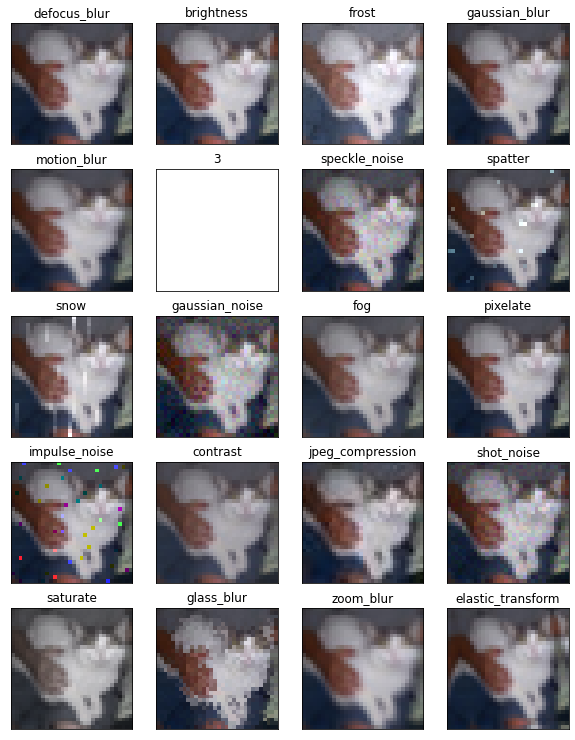

In [3]:
fig, axes = plt.subplots(5,4, figsize=(10,13))

idx = 77
for ax, (k, v) in zip(axes.ravel(), cifar10c.items()):
    try:
        ax.imshow(v[idx])
        ax.set_title(k)
    except:
        ax.set_title(v[idx])
    ax.set_xticks([])
    ax.set_yticks([])
    
    
plt.show()

In [8]:
shifts = ('frost', 'fog', 'snow')

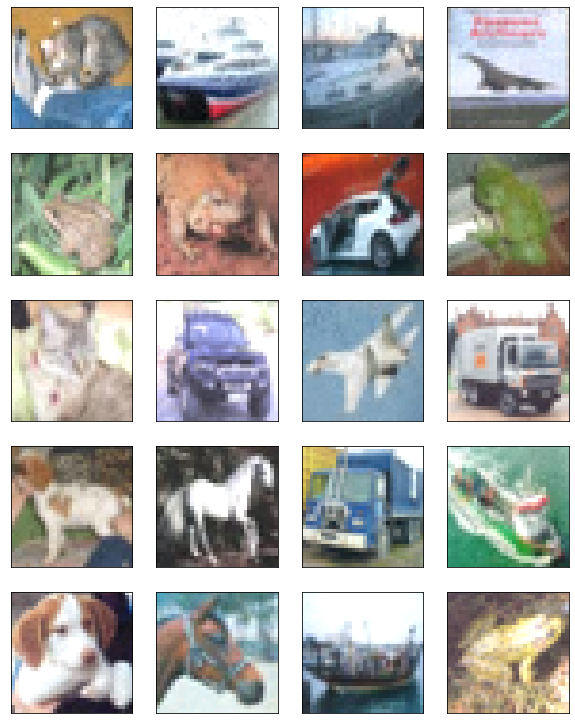

In [11]:
fig, axes = plt.subplots(5,4, figsize=(10,13))


for ax, im in zip(axes.ravel(), cifar10c['frost'][:20]):
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    
    
plt.show()


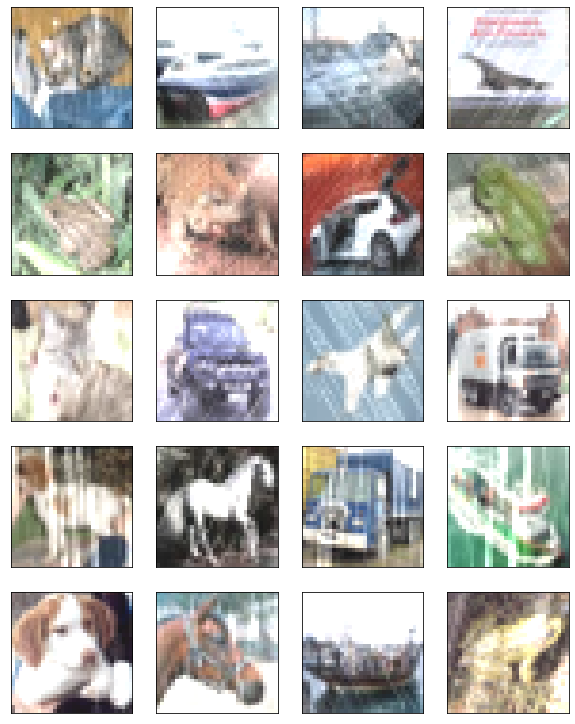

In [26]:
fig, axes = plt.subplots(5,4, figsize=(10,13))


for ax, im in zip(axes.ravel(), cifar10c['snow'][-10000:-10000+20]):
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    
    
plt.show()

In [14]:
import torchvision
cifar_test = torchvision.datasets.CIFAR10('/voyager/datasets', train=False)

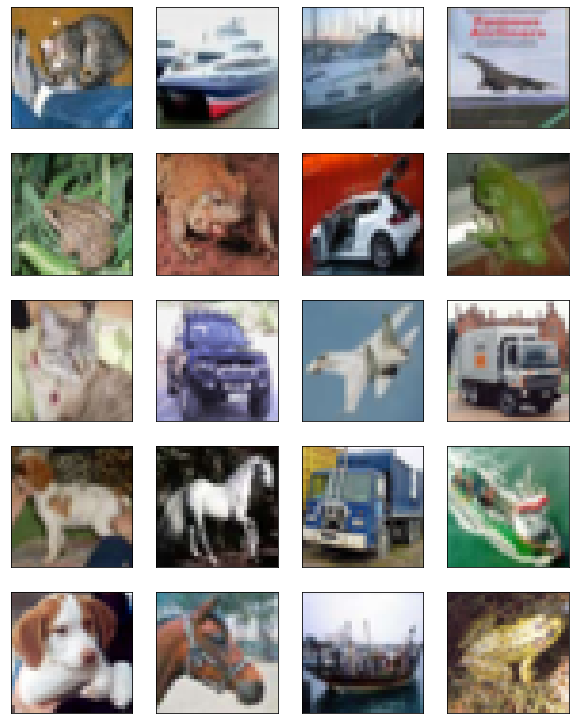

In [21]:
fig, axes = plt.subplots(5,4, figsize=(10,13))


for ax, i in zip(axes.ravel(), range(20)):
    ax.imshow(cifar_test[i][0])
    ax.set_xticks([])
    ax.set_yticks([])
    
    
plt.show()

In [32]:
(cifar10c['labels'][:10000]==cifar10c['labels'][40000:50000]).all()

True

In [33]:
from PIL.Image import fromarray

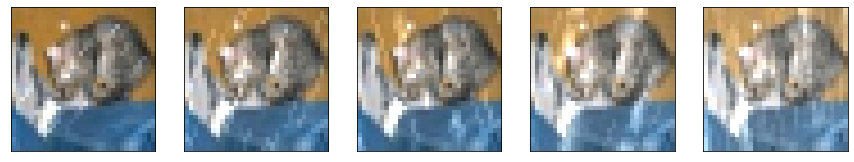

In [59]:
fig, axes = plt.subplots(1,5, figsize=(15,5))

idx=0
for ax, i in zip(axes.ravel(), range(5)):
    ax.imshow(cifar10c['snow'][i*10000 + idx])
    ax.set_xticks([])
    ax.set_yticks([])
    
    
plt.show()

In [1]:
import pytorch_lightning as pl
from glob import glob
import torch
import os

from datasets.cifar10 import CIFAR10DataModule
from modelling import CNN
from modelling.pretrained import resnet18_trained_on_cifar10
from experiments.rejectron.rejectron import RejectronClassifier

from tqdm import tqdm
import matplotlib.pyplot as plt

os.chdir(f'/voyager/projects/tomginsberg/pqlearning')

In [2]:
model = resnet18_trained_on_cifar10().cuda(0)

In [25]:
model = model.eval()

In [3]:
tr = pl.Trainer(gpus=[0])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [4]:
dataset = CIFAR10DataModule(shift_severity_range=(3,5), test_samples=1000)

In [6]:
tr.validate(model, dataset.train_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Validating: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_epoch/accuracy': 0.9842297434806824}
--------------------------------------------------------------------------------


[{'val_epoch/accuracy': 0.9842297434806824}]

In [7]:
tr.validate(model, dataset.val_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Validating: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_epoch/accuracy': 0.8778033256530762}
--------------------------------------------------------------------------------


[{'val_epoch/accuracy': 0.8778033256530762}]

In [30]:
tr.validate(model, dataset.test_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Validating: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_epoch/accuracy': 0.7438044548034668}
--------------------------------------------------------------------------------


[{'val_epoch/accuracy': 0.7438044548034668}]

In [15]:
hs = RejectronClassifier(h=model.cuda(0), device=0)
hs.C = [model.cuda(0)]

In [17]:
hs.compute_accuracy_and_rejection(dataset.test_dataloader())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.27s/it]


{'acc': 0.7429999709129333, 'rej': 0.0}

In [21]:
dataset.update_test_transform(True)

In [22]:
dataset.test_dataset.tf

Compose(
    ToTensor()
    Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
)